# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 8.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Reading the Data into a DataFrame

In [4]:
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/abtest.csv')
df = pd.DataFrame(data)

Mounted at /content/drive/


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [6]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.shape

(100, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df.groupby('group').count()

,user_id,landing_page,time_spent_on_the_page,converted,language_preferred
group,,,,,
control,50,50,50,50,50
treatment,50,50,50,50,50


In [ ]:
df.user_id.nunique()

100

In [ ]:
df.groupby(['group'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
group,
control,4.5324
treatment,6.2232


In [ ]:
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


In [ ]:
df.groupby(['group'])['converted'].value_counts()

group      converted
control    no           29
           yes          21
treatment  yes          33
           no           17
Name: count, dtype: int64

From given data of 100 rows (users) and 6 columns (user_id, landing_page, time_spent_on_the_page, converted, and language_preference) we can quickly conclude the following insights:

*   There are no null values in the data set across all the rows and columns.

*   All of the user_ids are unique, meaning that every participant in the study of 100 individuals is a different person and no 2 participants where counted twice.

*   The experiement is split evenlly between the control and the treatment group, with 50 participants in each group.

*   Between the two groups, the mean amount of time spent of the pages is higher with the group that landed on the new page (where the mean amount of time spent on the old page is ~4.53 minutes and the mean amount of time spent on the new page is ~6.22 minutes)

*   There were 3 different preffered languages between all the participants: English with 34 participants stating is was their preferred language, French with 34 participants stating it was their preferred language, and Spanish with 32 participants stating it was their preffered language.

*   Out of the 50 participants who landed on the old page, 21 (42% of the control group) converted to using the new page. While 33 (66% of the treatment group) of the 50 participants wo landed on the new page converted to using the new page.





### Univariate Analysis

In [7]:
df['time_spent_on_the_page'].nunique()
# Out of the 100 participants, 6 spent exact spent the exact same amount of time on their page

94

In [8]:
df['language_preferred'].value_counts()
# There were 3 different preffered languages between all the participants:
#English with 34 participants stating is was their preferred language,
#French with 34 participants stating it was their preferred language,
#and Spanish with 32 participants stating it was their preffered language.

,count
language_preferred,
Spanish,34
French,34
English,32


In [ ]:
for column in df:
    print(data[column].value_counts())
    print("-" * 50)

user_id
546592    1
546468    1
546462    1
546567    1
546459    1
         ..
546446    1
546544    1
546472    1
546481    1
546483    1
Name: count, Length: 100, dtype: int64
--------------------------------------------------
group
control      50
treatment    50
Name: count, dtype: int64
--------------------------------------------------
landing_page
old    50
new    50
Name: count, dtype: int64
--------------------------------------------------
time_spent_on_the_page
4.75    2
5.86    2
3.88    2
0.40    2
7.16    2
       ..
3.05    1
5.15    1
6.52    1
7.07    1
6.20    1
Name: count, Length: 94, dtype: int64
--------------------------------------------------
converted
yes    54
no     46
Name: count, dtype: int64
--------------------------------------------------
language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64
--------------------------------------------------


As previously stated, there are 50 participants in each of the control and treatement groups.

### Bivariate Analysis

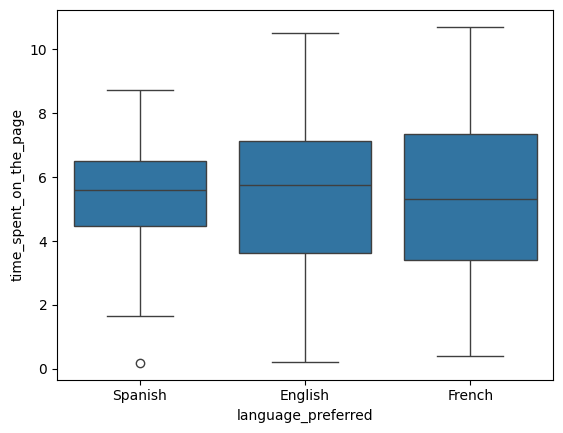

In [ ]:
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.show()
# From the box plots, we can see that the mean amount of time spent on each of the new and old sites is roughly the same, but the range for French is alot wider than the range for French and English.

In [ ]:
df.groupby(['language_preferred'])['converted'].value_counts()
# ~66% of English speakers became subscribers of the news sight,
# ~44% of French speakers became subscribers of the news sight,
# and ~52% of Spanish speakers became subscribers of the news sight

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: count, dtype: int64

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

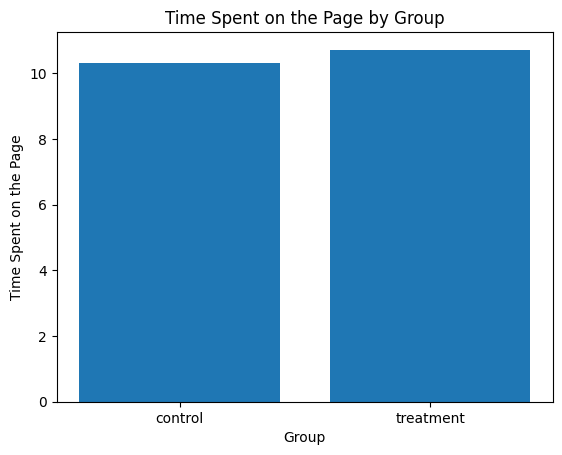

In [ ]:
plt.bar(x=df['group'],height =df['time_spent_on_the_page'])
plt.xlabel("Group") # Add a label to the x-axis.
plt.ylabel("Time Spent on the Page") # Add a label to the y-axis.
plt.title("Time Spent on the Page by Group") # Add a title to the chart.
plt.show()
#Users spent slightly more amount of time on the new landing page vs. the old landing page

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis as the amount of time spent of the old landing page ($\mu_1$) is the same as the new landing page ($\mu_2$):

H0:$\mu_1=\mu_2$

against the alternate hypothesis

Ha:$μ_1<μ_2$

### Step 2: Select Appropriate test

The test we will use is the Two Independent Sample T-test for Equality of Means - Unequal Std Dev

### Step 3: Decide the significance level

The significance level will be 5% as stated in the problem statement

### Step 4: Collect and prepare data

In [ ]:
from scipy.stats import ttest_ind

#time spent of the page for each group
control_time = df[df['group'] == 'control']['time_spent_on_the_page']
treatment_time = df[df['group'] == 'treatment']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
test_stat, p_value = ttest_ind(control_time, treatment_time , equal_var = False, alternative = 'less')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

Since the p-value (~0.0001) is less than the level of significance, we can reject the null hypothesis. Therefore, we do have enough evidence to support the claim that users spend more time on the new landing page than the exisiting one.

### Step 7:  Draw inference

We can conclude that users spend more time on the new landing page than the old one.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [ ]:
prop_new = df[df['group'] == 'treatment']['converted'].value_counts(normalize=True)['yes']
prop_old = df[df['group'] == 'control']['converted'].value_counts(normalize=True)['yes']
print('proportion of users who converted after using the new page: ', prop_new)
print('proportion of users who converted after using the old page: ', prop_old)

proportion of users who converted after using the new page:  0.66
proportion of users who converted after using the old page:  0.42


The proportion of users who visit the new page and get converted is greater than the proportion of users of visit the oldd page and get converted.

## 3. Is the conversion and preferred language are independent or related?

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

# Perform the Chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)

Chi-squared statistic: 3.0930306905370832
P-value: 0.2129888748754345


Sinse the p value is greater than the %% level of significance, we fail to reject the nulll hyppothesis and conclude that conversion and preferred language are independent.

## 4. Is the time spent on the new page same for the different language users?

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


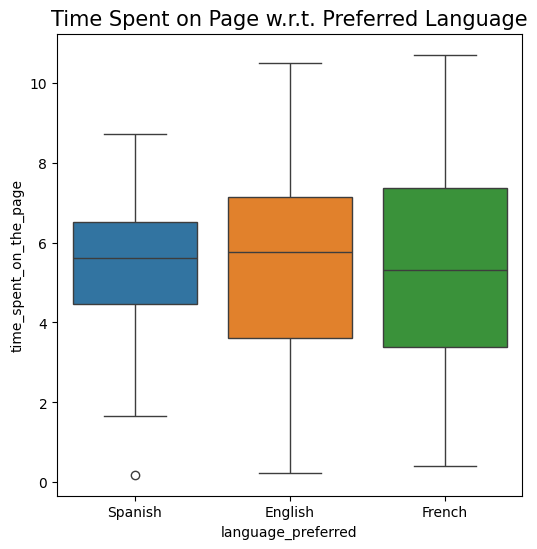

In [ ]:
print(df.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df, hue = 'language_preferred')
a.set_title("Time Spent on Page w.r.t. Preferred Language", fontsize=15)
plt.show()

As you can see from the box plot, the preferred language has little effect on the mean amount of time spent on the page. Although, it is worth noting that the range is much wider for English and French speakers than for Spanish speakers.

## Conclusion and Business Recommendations

From my findings, I would recommend that the news portal switches their landing page to the newer version. Participants in the study that landed on the new page on average spent more time on the sight and were more likely to subscibe to the news portal. Although not clearly shown in this study, it may be benificial to make the news portal more accessible and understandable for Spanish speakers.

In [ ]:
!jupyter nbconvert --to html "/content/ENews_Express_Learner_Notebook_Full_Code (1).ipynb"

[NbConvertApp] Converting notebook /content/ENews_Express_Learner_Notebook_Full_Code (1).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 426119 bytes to /content/ENews_Express_Learner_Notebook_Full_Code (1).html


___